# Data Mining Lab 1

陳奕君 111062610

This file contains the first part of HW1 (20%), which includes the take home exercise.

In [1]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer

import math
import nltk
import time
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

%matplotlib inline

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [2]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [3]:
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [4]:
# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [5]:
X_sample = X.sample(n=1000, random_state=0) #random state

In [6]:
# takes like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [7]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [8]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [9]:
mlb = preprocessing.LabelBinarizer()

## Exercise 1

In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [10]:
for i in range(3):
    print (f"text data {i}\n--------------------------------")
    print(twenty_train.data[i])

text data 0
--------------------------------
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

text data 1
--------------------------------
From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'g

## Exercise 2
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [11]:
# Query the record that the category is greater than 2 (so it only print out category 3 records)
X[X['category'] > 2]

text  category  \
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
...                                                 ...       ...   
2229  From: jcj@tellabs.com (jcj) Subject: Re: proof...         3   
2230  From: news@cbnewsk.att.com Subject: Re: Bible ...         3   
2246  From: lmvec@westminster.ac.uk (William Hargrea...         3   
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   

               category_name  \
2     soc.religion.christian   
3     soc.religion.christian   
4     soc.religion.christian   
5     soc.religion.christian   
6     soc.religion.christian   
...                      ...   
2229  soc.religion.christian   
2230  soc.religion.christian   
2246  soc.religion.christian   
2247  soc.religion.christian   
2249  soc.religion.christian   

                                               unigrams  
2     [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  
3     [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...  
4     [From, :, stanly, @, grok11.columbiasc.ncr.com...  
5     [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...  
6     [From, :, jodfishe, @, silver.ucs.indiana.edu,...  
...                                                 ...  
2229  [From, :, jcj, @, tellabs.com, (, jcj, ), Subj...  
2230  [From, :, news, @, cbnewsk.att.com, Subject, :...  
2246  [From, :, lmvec, @, westminster.ac.uk, (, Will...  
2247  [From, :, daniels, @, math.ufl.edu, (, TV, 's,...  
2249  [From, :, shellgate, !, llo, @, uu4.psi.com, (...  

[599 rows x 4 columns]

In [12]:
# using loc (by label)
X.loc[:10, 'category_name']

0              comp.graphics
1              comp.graphics
2     soc.religion.christian
3     soc.religion.christian
4     soc.religion.christian
5     soc.religion.christian
6     soc.religion.christian
7                    sci.med
8                    sci.med
9                    sci.med
10    soc.religion.christian
Name: category_name, dtype: object

In [13]:
# using iloc (by position)
X.iloc[:10, 2]

0             comp.graphics
1             comp.graphics
2    soc.religion.christian
3    soc.religion.christian
4    soc.religion.christian
5    soc.religion.christian
6    soc.religion.christian
7                   sci.med
8                   sci.med
9                   sci.med
Name: category_name, dtype: object

In [14]:
# using where, check the value we want
X.where(X == 1)

text  category category_name unigrams
0     NaN       1.0           NaN      NaN
1     NaN       1.0           NaN      NaN
2     NaN       NaN           NaN      NaN
3     NaN       NaN           NaN      NaN
4     NaN       NaN           NaN      NaN
...   ...       ...           ...      ...
2252  NaN       NaN           NaN      NaN
2253  NaN       NaN           NaN      NaN
2254  NaN       NaN           NaN      NaN
2255  NaN       NaN           NaN      NaN
2256  NaN       NaN           NaN      NaN

[2257 rows x 4 columns]

## Exercise 3
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [15]:
count = 0
for i in range(10):
    a = X[i*10:i*10+10].query('category_name == "sci.med"') # query every 10th record
    for j in range(len(a)):
        count += 1
        print(f"Record belongs to sci.med: {count}")
        print(a.iloc[j]) # get the record of index j
        print("---\n")
        # check whether we only print out 5 records or not
        if (count == 5):
            break
    if (count == 5):
        break

Record belongs to sci.med: 1
text             From: aldridge@netcom.com (Jacquelin Aldridge)...
category                                                         2
category_name                                              sci.med
unigrams         [From, :, aldridge, @, netcom.com, (, Jacqueli...
Name: 7, dtype: object
---

Record belongs to sci.med: 2
text             From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
category                                                         2
category_name                                              sci.med
unigrams         [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...
Name: 8, dtype: object
---

Record belongs to sci.med: 3
text             From: libman@hsc.usc.edu (Marlena Libman) Subj...
category                                                         2
category_name                                              sci.med
unigrams         [From, :, libman, @, hsc.usc.edu, (, Marlena, ...
Name: 9, dtype: object
---

Record belongs to sci.med

## Exercise 4
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [16]:
# Answer here
# axis=0, calculate it by column
# axis=1, calculate it by row
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

## Exercise 5
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

**My Answer**
- Because Row 2, 3, 5 are string, so they are not null.
- Row 0 is nan, which means not a number = null
- Row 1 is missing value.
- Row 4 is true None.


In [17]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [18]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

## Exercise 6
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

**My Answer**


1. The order is not the same as the original dataframe.
2. Originally, there are more records in the category 3 than the other categories. 
 But after sampling the result may not be the same. (Here is same, but I did lots of experiments and show sometimes category 1 or 2 would be the most.)
3. The difference between the largest category group and the smallest category group is smaller than the original dataframe.

In [19]:
print(X.query("category == 0").count()["category"])
print(X.query("category == 1").count()["category"])
print(X.query("category == 2").count()["category"])
print(X.query("category == 3").count()["category"])

480
584
594
599


In [20]:
print(X_sample.query("category == 0").count()["category"])
print(X_sample.query("category == 1").count()["category"])
print(X_sample.query("category == 2").count()["category"])
print(X_sample.query("category == 3").count()["category"])

218
256
262
264


## Exercise 7
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<AxesSubplot: title={'center': 'Category distribution'}>

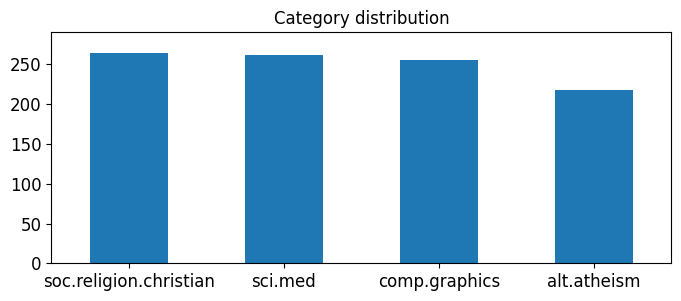

In [21]:
# Answer here

# get the maximum of category_name counts
max = X_sample.category_name.value_counts().max()

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, max + 0.1*max], # use maximum to scale the ylim
                                           rot = 0, fontsize = 12, figsize = (8,3))

## Exercise 8
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

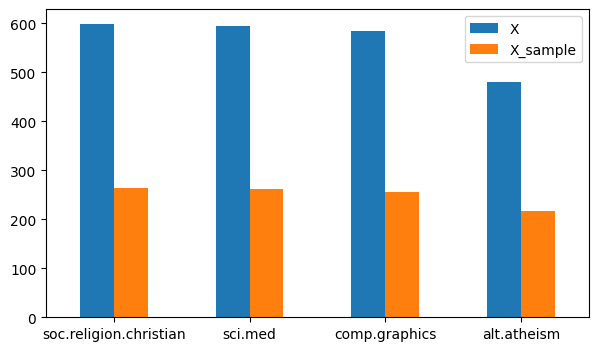

In [22]:
# Answer here
a = X.category_name.value_counts()        # get data X
b = X_sample.category_name.value_counts() # get sampling data X_sample
index = a.index.values.tolist()

# combine them into a new dataframe so we can use the dataframe.plot.bar function
df = pd.DataFrame({"X": a, "X_sample": b}, index=index)

ax = df.plot.bar(rot=0, figsize=(7, 4))

## Exercise 9
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [23]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
# Just simply feed into the analyzer, then we get the tokenized texts.
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

## Exercise 10
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

**My Answer**

Here I make a helper function that we only need to specify the document id we want, then it can print out the word inside the document, including term_id, word, and the number of this word appears in this document. You can also specify the position index you want for word in specific document.

In [29]:
# we convert from sparse array to normal array, and get the index of 1
X_counts_dense = X_counts.toarray()
X_index = np.where(X_counts_dense != 0)
X_index[0].shape[0]

365886

In [31]:
# get the vocabulary dictionary, it's same as get_feature_names_out()
vocab = list(count_vect.vocabulary_.items())
new_vocab = {}
for v in vocab:
    new_vocab[v[1]] = v[0]
vocab = new_vocab

In [32]:
# Get the words in document i
# It can also query word of position j in document i

def get_word(doc, limit=10, pos=-1):
    if (pos > 0):
        if (X_counts_dense[doc][pos] == 0):
            print(f"Document {doc} doesn't has the word \"{vocab[pos]}\".")
        else:
            print(vocab[pos])
        return
    
    # Gather the word index of document i
    word_index = []
    for j in range(X_index[0].shape[0]):
        if (X_index[0][j] == doc):
            word_index.append(X_index[1][j])
    
    print(f"There are total {len(word_index)} different token in document {i}.")
    print(f"We are going to print the first {limit} term.\n")
    
    print(f"term_id   word          count") # 10 15 1
    l = 0
    for j in word_index:
        print(f"{j:<10}{vocab[j]:<15}{X_counts_dense[doc][j]}")
        l += 1
        if l == limit:
            break

In [33]:
# Query document 0 for 10 term
get_word(doc=0)

There are total 73 different token in document 2.
We are going to print the first 10 term.

term_id   word          count
177       071            2
230       0hb            1
587       14             1
2326      477            2
3062      8000           1
3166      8565           1
4017      ac             2
4378      advance        1
4808      also           1
5195      any            1


In [34]:
# Query document 100 for 20 term
# We can see the second 1 in document 4 represents word '01'.
get_word(doc=4, limit=20)

There are total 110 different token in document 2.
We are going to print the first 20 term.

term_id   word          count
0         00             1
37        01             1
587       14             1
677       15             1
1102      1993           2
1490      22             1
1540      22824          1
1742      28246          1
2203      41             1
2513      56             2
2521      57             1
4852      am             1
4992      and            3
5340      apr            2
5410      are            2
5529      article        2
5549      as             2
5698      at             1
5730      athos          2
5777      attend         1


In [35]:
# get doc 100 pos 6597
get_word(doc=100, pos=6597)

bible


In [36]:
# get doc 100 pos 6598
get_word(doc=100, pos=6598)

Document 100 doesn't has the word "bibles".


## Exercise 11
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization.

**My Answer**

At first I use the heatmap to visualize the term-document matrix, but I realize that it doesn't need to draw the 0 out, so I use the scatter point plot, if there is one, there is a dot, it there is zero, then it is nothing there.

We can see that there are 2 term at the right side of the graph that appear in most documents, and other just appear once or a few times in all documents.

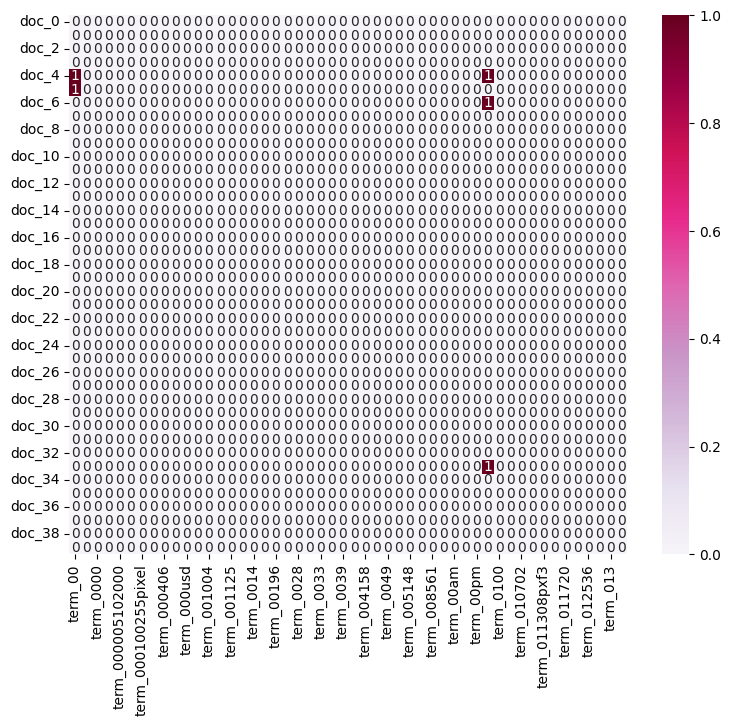

In [37]:
# Answer here
# Select 40 documents and 50 terms to heatmap visualization
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:50]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:40]]
plot_z = X_counts[0:40, 0:50].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Text(0, 0.5, 'document id')

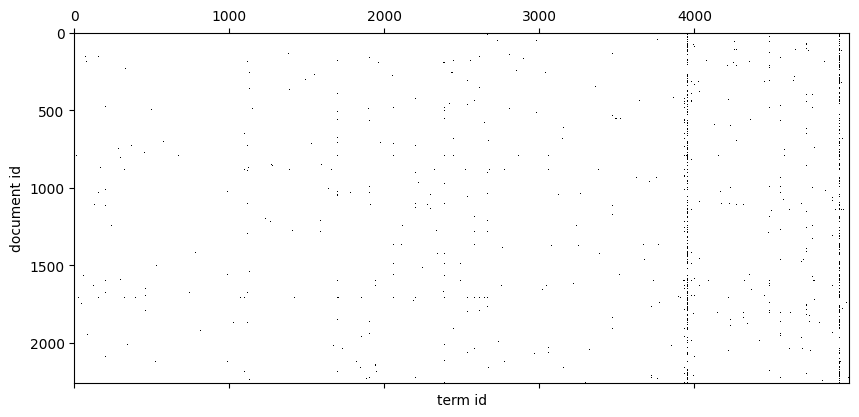

In [42]:
# Or we can use a scatter point for visualization
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[:5000]]
plot_y = ["doc_"+ str(i) for i in list(X.index)]
plot_z = X_counts[:, :5000].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 20))
plt.spy(df_todraw)
plt.xlabel("term id")
plt.ylabel("document id")

## Exercise 12
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [43]:
# Answer here
# Do PCA on X_counts with n_components = 3
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2257, 3)


Origin view point


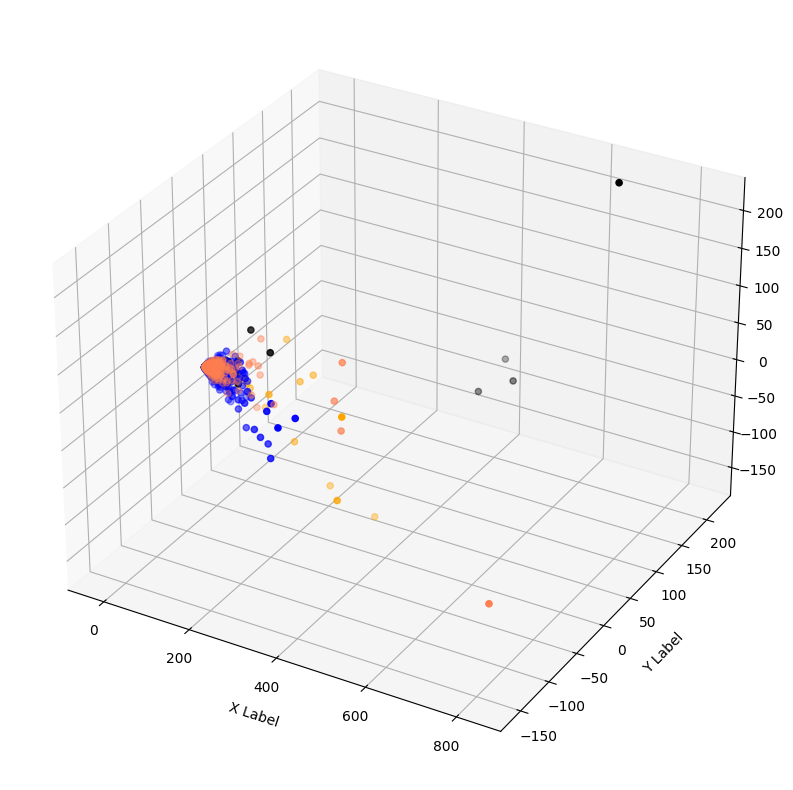

In [44]:
col = ['coral', 'blue', 'black', 'orange']
plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    data = X_reduced[X['category_name'] == category].T
    xs = data[0]
    ys = data[1]
    zs = data[2]
   
    ax.scatter3D(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

print("Origin view point")

plt.show()

<class 'matplotlib.axes._subplots.Axes3DSubplot'>
View point: elev=20, azim=45, roll=5


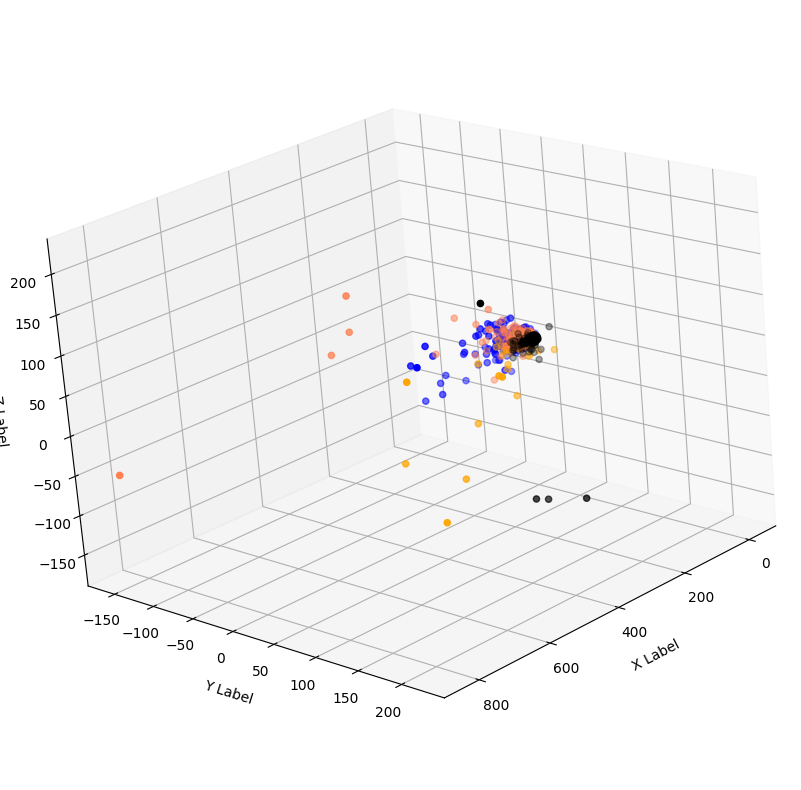

In [45]:
plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
print(type(ax))

for c, category in zip(col, categories):
    data = X_reduced[X['category_name'] == category].T
    xs = data[0]
    ys = data[1]
    zs = data[2]
   
    ax.scatter3D(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax.view_init(elev=20, azim=45, roll=5)
print("View point: elev=20, azim=45, roll=5")

plt.show()

<class 'matplotlib.axes._subplots.Axes3DSubplot'>
View point: elev=30, axim=100, roll=0


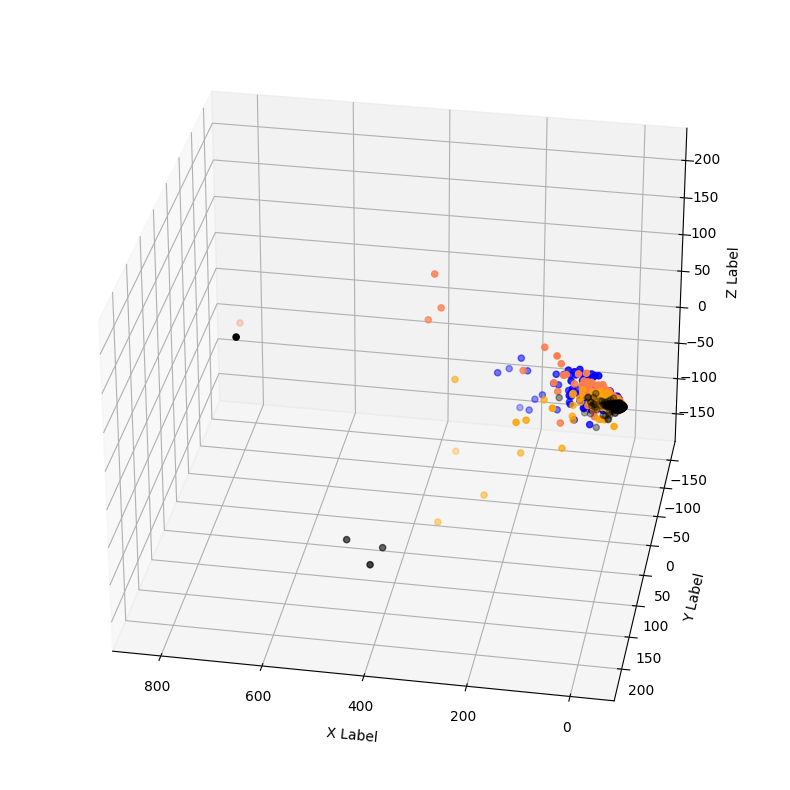

In [46]:
plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
print(type(ax))

for c, category in zip(col, categories):
    data = X_reduced[X['category_name'] == category].T
    xs = data[0]
    ys = data[1]
    zs = data[2]
   
    ax.scatter3D(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax.view_init(elev=30, azim=100, roll=0)
print("View point: elev=30, axim=100, roll=0")

plt.show()

**What I found**
1. Documents in category “soc.religion.christian” are more aggregated than other categories, or we can say it has less outliers.
2. The center of 4 categories are really close, it may indicate that PCA analysis of 3 components are not suitable for clustering these documents, but it is good to reduce the dimensionality.

## Exercise 13
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [47]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
start = time.time()
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
end = time.time()
print(end - start, " sec")

86.44156694412231  sec


In [53]:
start = time.time()
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
end = time.time()
print(end - start, " sec")

0.0011410713195800781  sec


0.8734619617462158  sec


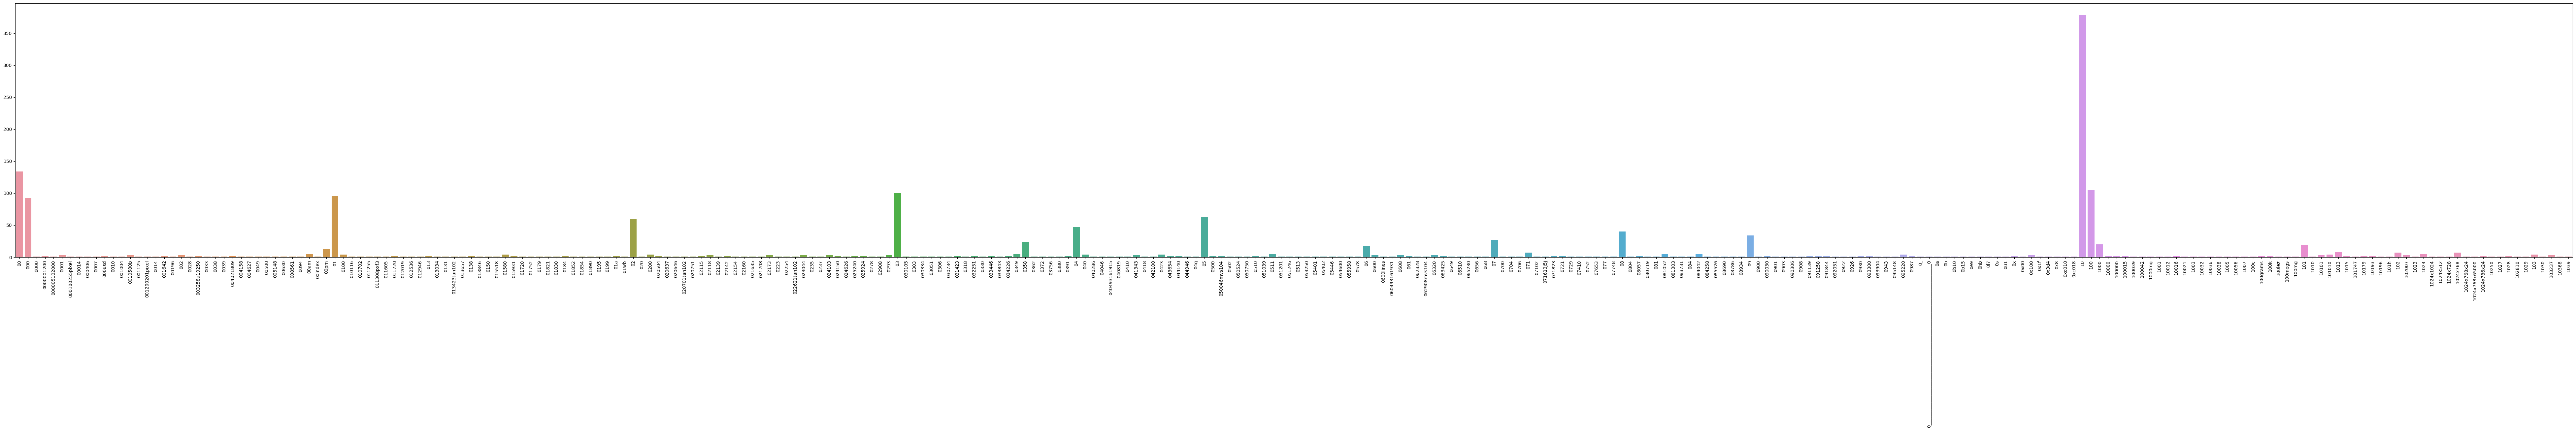

In [54]:
# The example
start = time.time()
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);
end = time.time()
print(end - start, " sec")

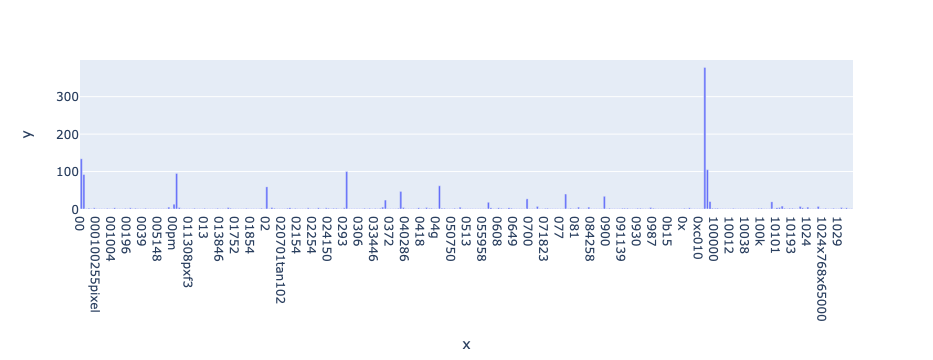

1.052793025970459  sec


In [55]:
# Answer here
start = time.time()
fig = px.bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
fig.show()
end = time.time()
print(end - start, " sec")

## Exercise 14
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

**My Answer**

To reduce the number of terms of visualization, just simply change the number of `term_frequencies` we feed into `px.bar` function. I write a custom fucntion so that we can decide how many terms and where you want to start for visualization.

In [56]:
# Answer here

# Default we visualize first 100 terms
def vis_term(num=100, start=0):
    tf_temp = term_frequencies[start:start+num]
    fn_temp = count_vect.get_feature_names_out()[start:start+num]
    fig = px.bar(x=fn_temp, y=tf_temp)
    fig.show()

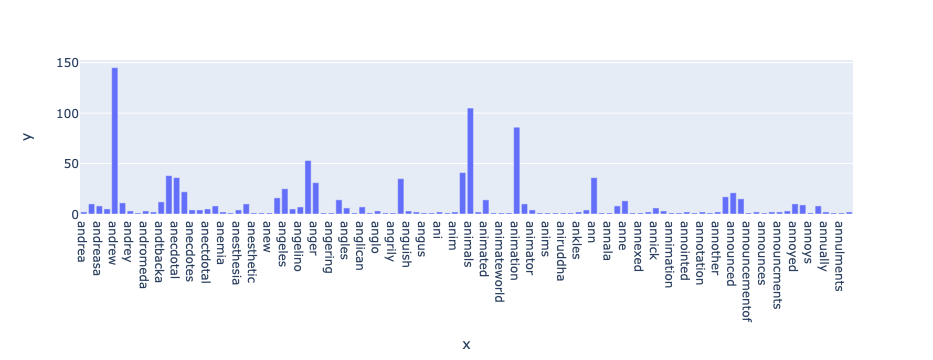

In [57]:
vis_term(num=100, start=5000)

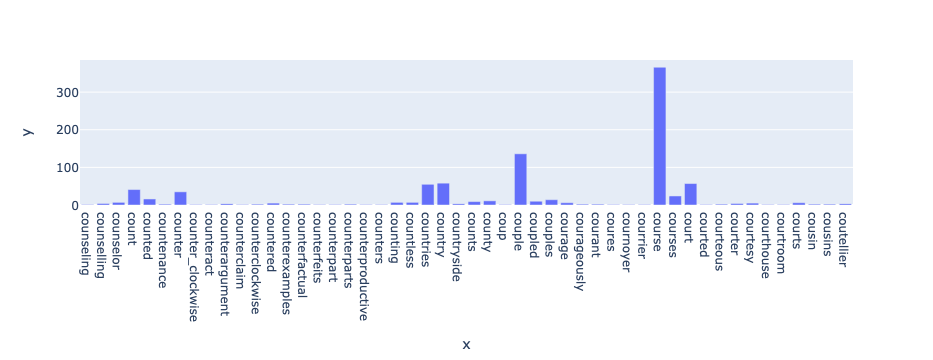

In [58]:
vis_term(num=50, start=10000)

## Exercise 15
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

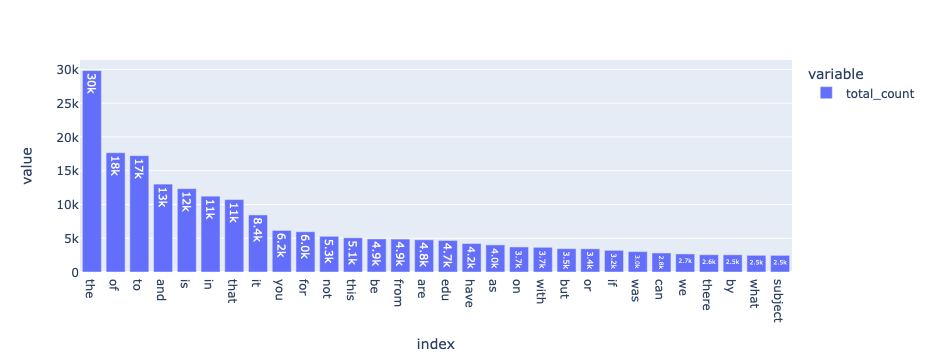

In [59]:
# Answer here

# We may want to know what is the most frequent word in document, 
# so first we make a dataframe that sort by total_count of all terms
td = pd.DataFrame(X_counts.toarray())
td.columns = count_vect.get_feature_names_out()
tdm = td.T
tdm.columns = ['doc_' + str(i) for i in range(X_counts.shape[0])]
tdm['total_count'] = tdm.sum(axis=1)
tdm = tdm.sort_values(by='total_count', ascending=False) # Here we get the sorted total_count
tfs = tdm['total_count'] # extract the total_count to plot


# Then we plot the top 30 frequent terms in bar plot
fig = px.bar(tfs[:30], text_auto='.2s')
fig.show()

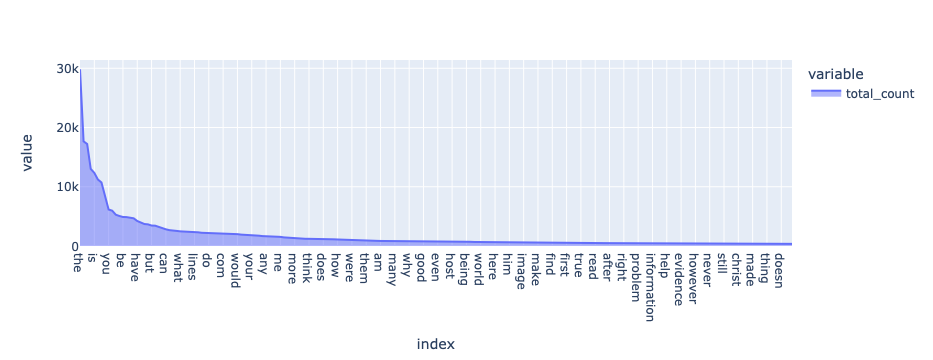

In [60]:
# Or we can plot the line graph with filling color in area
fig = px.area(tfs[:200])
fig.show()

## Exercise 16
Try to generate the binarization using the `category_name` column instead. Does it work?

In [61]:
# Answer here
# Yes, it works!
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

  bin_category_name  
0      [0, 1, 0, 0]  
1      [0, 1, 0, 0]  
2      [0, 0, 0, 1]  
3      [0, 0, 0, 1]  
4      [0, 0, 0, 1]  
5      [0, 0, 0, 1]  
6      [0, 0, 0, 1]  
7      [0, 0, 1, 0]  
8      [0, 0, 1, 0]